In [ ]:
import pandas as pd

import plotnine as p9

# from plotnine import data

from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

In [2]:
dim1 = "method"
dim2 = "source"
# dim2 = "reference"
dim3 = "eval"

In [3]:
dfa = pd.read_excel(f"evaluation.xlsx")

dfa["reference"] = dfa["location"].apply(
    lambda x: "psalm" if x.startswith("ps") else "gospel"
)
dfa["source"] = dfa["src"].apply(lambda x: x.split(".")[-2])
dfa.head()

,query,location,row,similarity,original,method,src,eval,reference,source
0,и҅ се кде вь҆ сиѡ̑новѣ градѣ· цѣсара великаа҅г...,ps 73,1137,0.0714,г҃ разоумъ асафов,lcs,syntacticus.psalter.sinai.ps,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,psalm,sinai
1,и҅ се кде вь҆ сиѡ̑новѣ градѣ· цѣсара великаа҅г...,ps 73,1138,0.2000,сѩ ѣрость твоѣ на овьцѩ пажіті твое,lcs,syntacticus.psalter.sinai.ps,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,psalm,sinai
2,и҅ се кде вь҆ сиѡ̑новѣ градѣ· цѣсара великаа҅г...,ps 73,1139,0.1939,сънемъ твоі їже сътѩжа їспръва їзбавілъ есі ж...,lcs,syntacticus.psalter.sinai.ps,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,psalm,sinai
3,и҅ се кде вь҆ сиѡ̑новѣ градѣ· цѣсара великаа҅г...,ps 73,1140,0.3412,рѫцѣ твоі на гръдꙑнѩ іхъ въ коньці елико лѫка...,lcs,syntacticus.psalter.sinai.ps,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,psalm,sinai
4,и҅ се кде вь҆ сиѡ̑новѣ градѣ· цѣсара великаа҅г...,ps 73,1141,0.2658,ишѩ сѩ ненавідѩштеі тебе посрѣдѣ праздьніка тв...,lcs,syntacticus.psalter.sinai.ps,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,psalm,sinai


In [4]:
df1 = pysqldf(
    f"""
SELECT
    query, location,
    MIN(row) rank,
    MIN(similarity) score,
    original, method, src, eval, reference, source
FROM dfa
GROUP BY query, location, method, src, eval, reference, source
"""
)

df1.head()

,query,location,rank,score,original,method,src,eval,reference,source
0,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,1139,0.3941,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,LaBSE,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus
1,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,252,0.3766,Слꙑшасте ѣко речено бꙑстъ древьн҄имъ не прѣл҄ю...,LaBSE,syntacticus.gospel.zographensis.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,zographensis
2,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,1382,0.5692,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,LaBSE-en-ru-bviolet,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus
3,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,319,0.5575,Слꙑшасте ѣко речено бꙑстъ древьн҄имъ не прѣл҄ю...,LaBSE-en-ru-bviolet,syntacticus.gospel.zographensis.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,zographensis
4,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,0,0.3600,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,b25,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus


In [5]:
pysqldf(
    f"""
SELECT
    `{dim2}`, COUNT(DISTINCT query) tests
FROM df1
GROUP BY `{dim2}`
"""
)

,source,tests
0,bologna,54
1,marianus,24
2,sinai,54
3,zographensis,10


In [10]:
df2 = pysqldf(
    f"""
SELECT
    *,
    CASE source
        WHEN 'zographensis' THEN 10
        WHEN 'marianus' THEN 24
        ELSE 54
    END total
FROM df1
"""
)

df2.head()

,query,location,rank,score,original,method,src,eval,reference,source,total
0,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,1139,0.3941,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,LaBSE,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus,24
1,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,252,0.3766,Слꙑшасте ѣко речено бꙑстъ древьн҄имъ не прѣл҄ю...,LaBSE,syntacticus.gospel.zographensis.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,zographensis,10
2,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,1382,0.5692,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,LaBSE-en-ru-bviolet,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus,24
3,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,319,0.5575,Слꙑшасте ѣко речено бꙑстъ древьн҄имъ не прѣл҄ю...,LaBSE-en-ru-bviolet,syntacticus.gospel.zographensis.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,zographensis,10
4,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,0,0.3600,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,b25,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus,24


In [11]:
pysqldf(
    f"""
SELECT
    *,
    COUNT(DISTINCT query) count,
    (1.0 * COUNT(DISTINCT query)) /total share
FROM df2
GROUP BY `{dim1}`, `{dim2}`
ORDER BY share DESC
"""
)

,query,location,rank,score,original,method,src,eval,reference,source,total,count,share
0,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,4268,0.4768,О г҃и сп҃и же ⁘ О г҃и поспѣши же ⁘,LaBSE,oxford.psalter.bologna.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,bologna,54,54,1.000000
1,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,1874,0.4382,Ѡ г҃і сп҃і же Ѡ г҃і поспѣши же,LaBSE,syntacticus.psalter.sinai.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,sinai,54,54,1.000000
2,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,4400,0.6773,О г҃и сп҃и же ⁘ О г҃и поспѣши же ⁘,LaBSE-en-ru-bviolet,oxford.psalter.bologna.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,bologna,54,54,1.000000
3,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,1382,0.5692,Слꙑшасте ѣко речено бꙑⷭ҇ древънимъ не прѣлюбꙑ ...,LaBSE-en-ru-bviolet,syntacticus.gospel.marianus.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,marianus,24,24,1.000000
4,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,1955,0.5935,Ѡ г҃і сп҃і же Ѡ г҃і поспѣши же,LaBSE-en-ru-bviolet,syntacticus.psalter.sinai.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,sinai,54,54,1.000000
5,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,319,0.5575,Слꙑшасте ѣко речено бꙑстъ древьн҄имъ не прѣл҄ю...,LaBSE-en-ru-bviolet,syntacticus.gospel.zographensis.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,zographensis,10,10,1.000000
6,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,3,0.3633,Ѡ г҃і сп҃і же Ѡ г҃і поспѣши же,b25,syntacticus.psalter.sinai.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,sinai,54,54,1.000000
7,"въ еѵаггелїи господь: слышасте, ꙗко речено бы...",matthaeo 5.27,297,0.2969,Слꙑшасте ѣко речено бꙑстъ древьн҄имъ не прѣл҄ю...,bi-encoder-russian-msmarco,syntacticus.gospel.zographensis.matthaeo,evaluation-1xppiRNK4cCHHW3GqDCL8tliAeZDPg87PTf...,gospel,zographensis,10,10,1.000000
8,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,4396,0.5263,О г҃и сп҃и же ⁘ О г҃и поспѣши же ⁘,evenki-russian-parallel-corpora,oxford.psalter.bologna.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,bologna,54,54,1.000000
9,о г҃і с҃псі • о г҃і поспѣші • б҃лгонъ грѧдѧі ...,ps 117.25,1950,0.4886,Ѡ г҃і сп҃і же Ѡ г҃і поспѣши же,evenki-russian-parallel-corpora,syntacticus.psalter.sinai.ps,evaluation-1hBilgcFMrdbnLkqM2x21ke42WZaAbyFJ-1...,psalm,sinai,54,54,1.000000


In [13]:
df3 = pysqldf(
    f"""
SELECT
    `{dim1}`, `{dim2}`, `{dim3}`,
    avg(rank) rank,
    avg(score) score,
    COUNT(DISTINCT query) count,
    (1.0 * COUNT(DISTINCT query)) /total share
FROM df2
WHERE method != 'regex'
GROUP BY `{dim1}`, `{dim2}`, `{dim3}`
ORDER BY `share` DESC
"""
)

df3.head()

,method,source,eval,rank,score,count,share
0,LaBSE,bologna,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,2654.959184,0.246606,50,0.925926
1,LaBSE,sinai,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,872.212766,0.247827,50,0.925926
2,LaBSE-en-ru-bviolet,bologna,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,3528.444444,0.444858,50,0.925926
3,LaBSE-en-ru-bviolet,sinai,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,1185.773196,0.399523,50,0.925926
4,b25,sinai,evaluation-1YRBLiZqsTPZEBiyuZ01-gKxcPyl9VT0IoN...,54.968421,0.220021,50,0.925926


/home/mapto/work/dllcm/BogoSlov/venv/lib/python3.12/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 7 x 5 in image.
/home/mapto/work/dllcm/BogoSlov/venv/lib/python3.12/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: bar-method-source-eval-rank.png


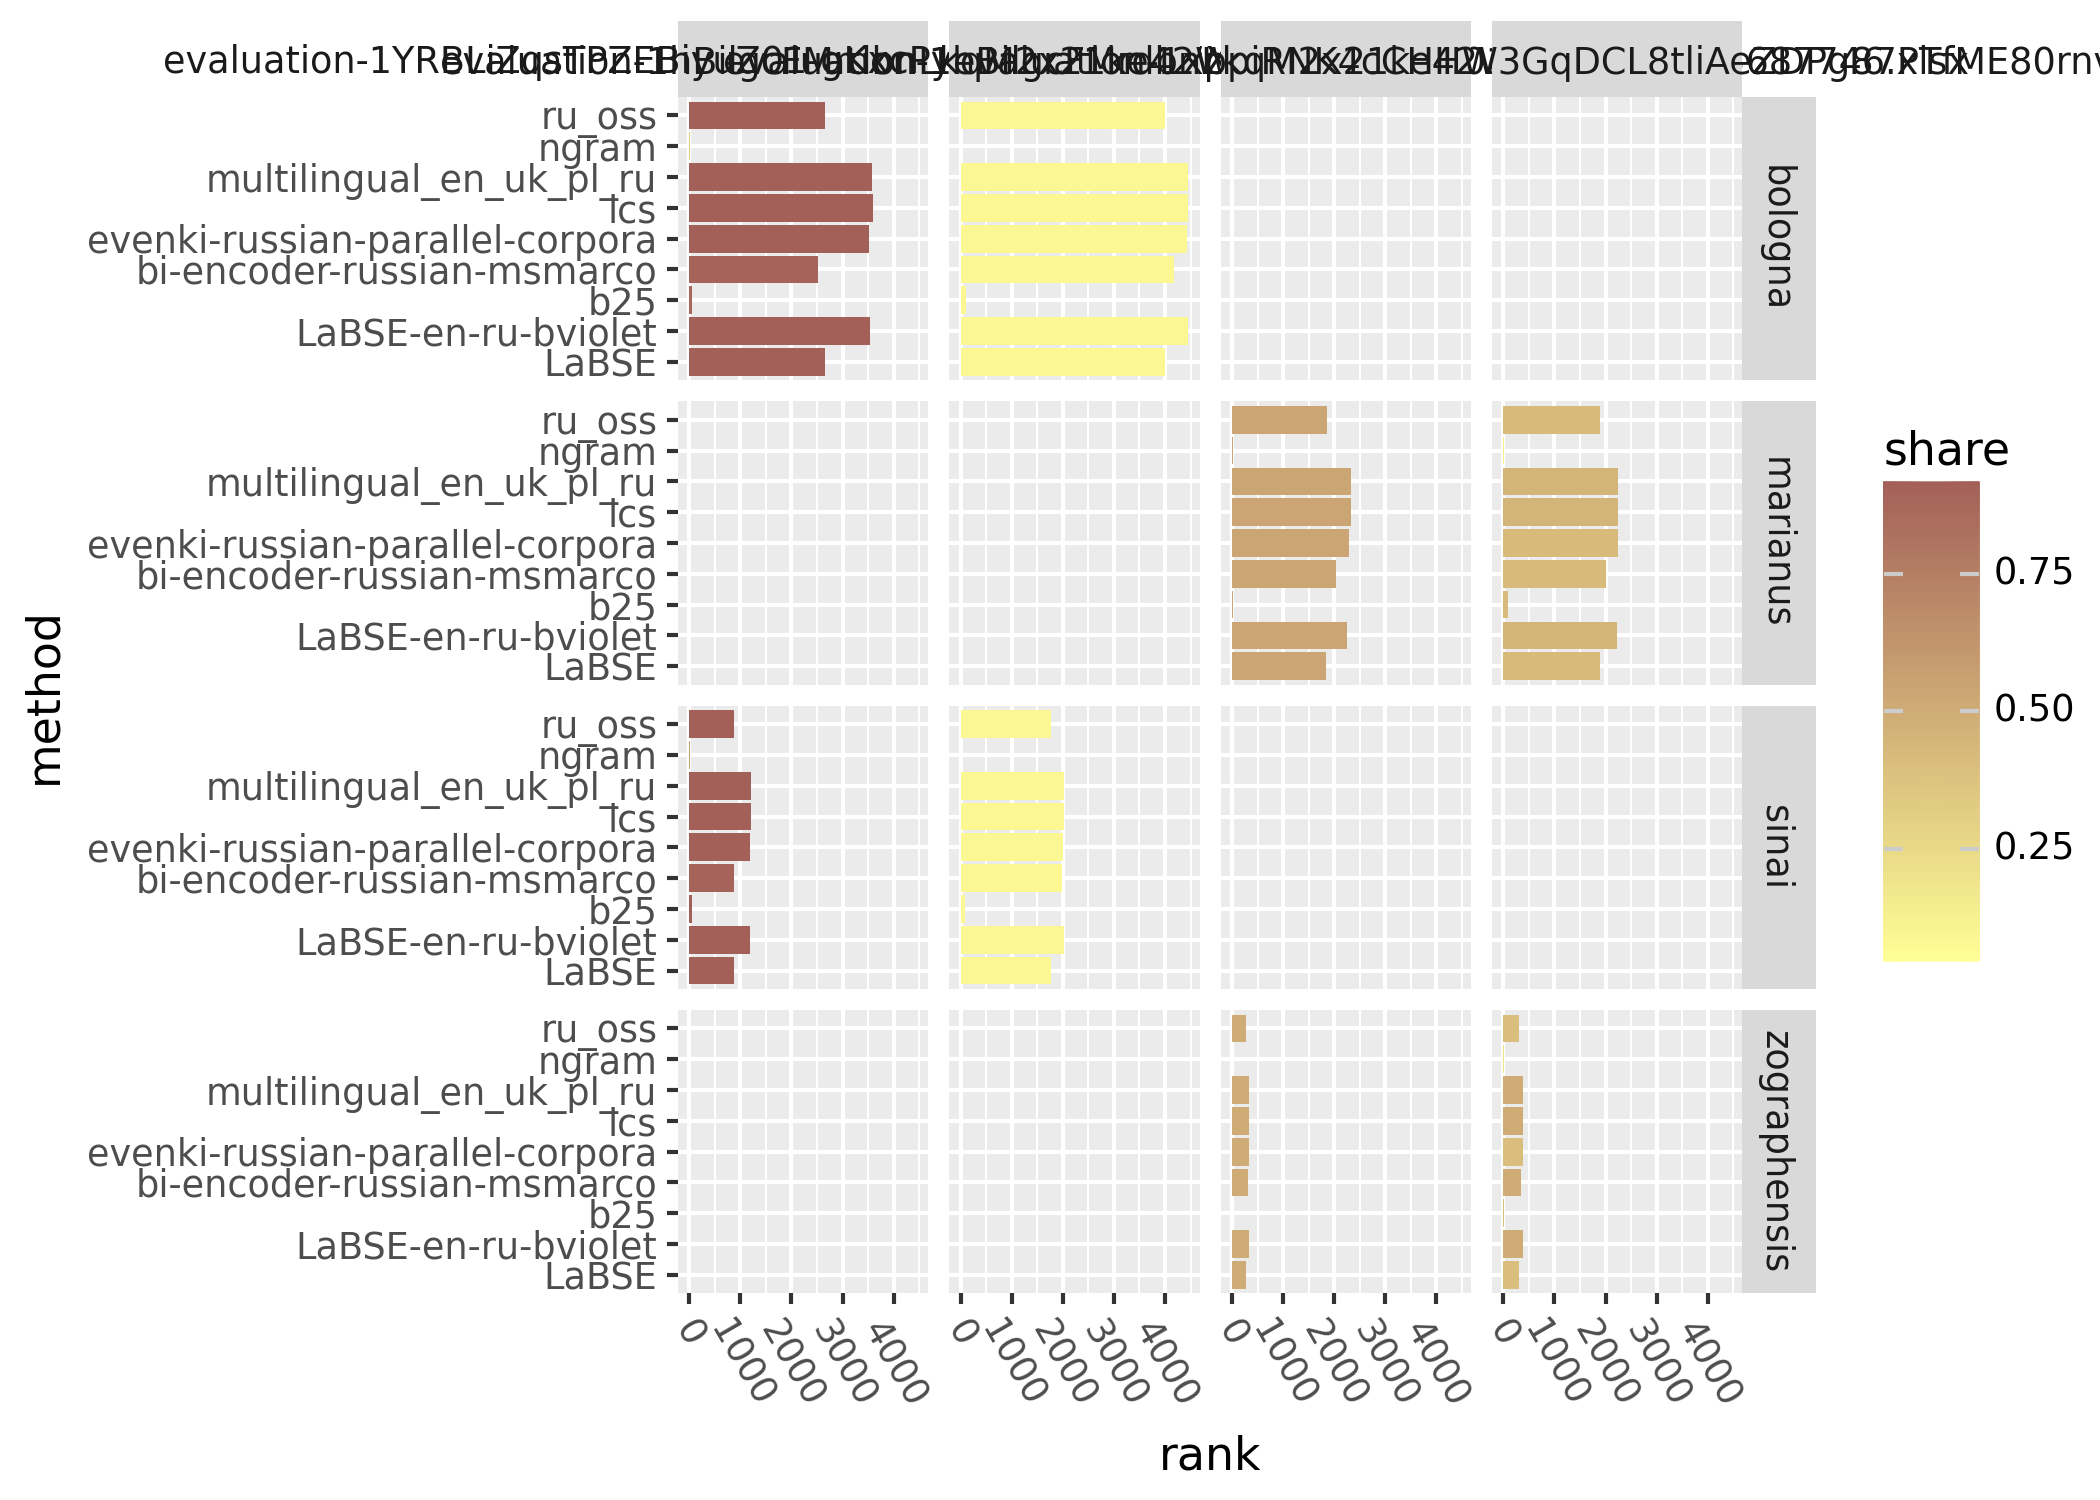

In [15]:
plot = (
    p9.ggplot(
        df3,
        p9.aes(
            x=dim1,
            y="rank",
            # colour="count",
            fill="share",
            # fill="score",
        ),
    )
    + p9.geom_col(stat="identity", position="dodge")
    + p9.scale_fill_gradient(low="#FFFF96", high="#A36058")
    # + p9.scale_y_log10()
    + p9.coord_flip()
    + p9.facet_grid(dim2, dim3)
    # + p9.facet_wrap(dim2)
    + p9.theme(
        dpi=150,
        figure_size=(7, 5),
        axis_text_x=p9.element_text(rotation=-60, hjust=0.5),
    )
)
plot.save(filename=f"bar-{dim1}-{dim2}-{dim3}-rank.png")
plot